# Getting started with Keras and Tensorflow

<img src="figures/keras-tensorflow-logo.jpg">

## Introduction

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.

We will be mostly writing python code using Keras libraries, but "under the hood" Keras is using tensorflow libraries.

The documentation is at [keras.io](https://keras.io).

## If you want to use R instead of python

Keras can run on R as well, it will look quite similar to the code in this notebook (but, you know, with <- instead of =). You find the docs here: https://keras.rstudio.com/

## Installing the relevant libraries



Setting up Keras and Tensorflow is pretty simple if you have Anaconda installed.

```
pip install tensorflow #if you want to use a GPU (NOT on your laptop), install tensorflow-gpu instead
pip install keras
```

Other useful libraries:

```
pip install jupyter
pip install numpy
pip install matplotlib
pip install mpld3
```

These commands can be run from a shell on Linux or Mac. If you have Windows, it might be easier to use Anaconda Navigator.

You can also install straight from this notebook:

In [8]:
import sys

!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install mpld3
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install graphviz

You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector is actually > such a tensor), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.

> TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays, which are referred to as tensors.

So, in this case, a neural network is defined in TensorFlow as graphs through which the data flows until the final result is produced.

From a practical standpoint, this means that before we can do any operation on our data (images, etc) we need to connect a series of nodes (our layers) to each other. When we have a full graph built from input to output, we can run our data (training or testing) through it.

Important: bear in mind that tensors and data are *not* the same thing. Tensors are, rather, the symbolic inputs and outputs to our layers. Think about the function g = f(x): as long as we do not provide a value to x, we will not have a fully computed g. In this case, "g" is the output tensor and x the input tensor.

Now an example: let's say that we have a set of color images of size 1000x1000 pixels (1 megapixel) that we want to use to train our model. This means that tensors should have shape (n, 1000, 1000, 3), where n is the number of images that we are presenting to our network in one go (one batch block, usually), and 3 is the number of channels (color images are actually a combination of RGB channels fused together).

If the images are not in color, but in black and white, this means that our tensors will have shape (n, 1000, 1000, 1), where we only have one channel.

The main thing to remember when building a TF graph is (and this is very important) that the dimensions between tensors coming out of the n-th node and those going into the (n+1)-th node must match. If the first layer to our network outputs a 3D tensor (number of batches included), the second layer must accept a 3D tensor as input, and so on.

Check the following graph representation of a MLP layer:

<img src="figures/run_metadata_graph.png">

## A neural network in Keras is called a Model

The simplest kind of model is of the Sequential kind:

In [37]:

from keras.models import Sequential

model = Sequential()

This is an "empty" model, with no layers, no inputs or outputs are defined either.

Adding layer is easy:

In [40]:
from keras.layers import Dense

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))


A "Dense" layer is a fully connected layer as the ones we have seen in Multi-layer Perceptrons.
The above is equal to having this network:

<img src="figures/simplenet.png">


If we want to see the layers in the Model this far, we can just call:

In [41]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 8         
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________

Or if you want a nice figure for your next paper, I suggest using:

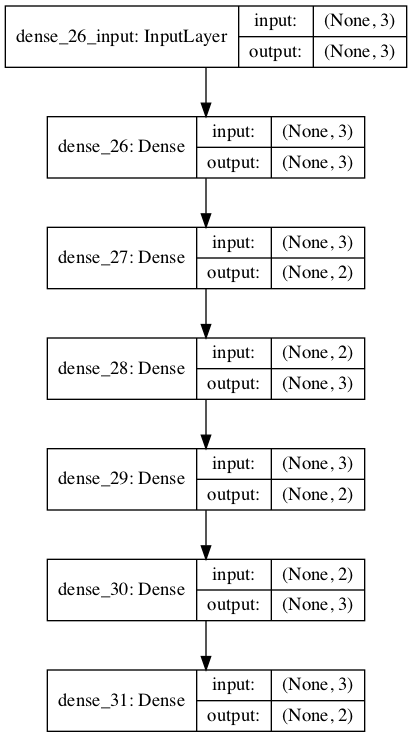

In [42]:
from keras.utils import plot_model

plot_model(model, "figures/simplenet_model.png", show_shapes=True)

<img src="figures/simplenet_model.png?random=323527528432525.24234">

Notice the number of parameters, can you tell why 12 and 8 parameters for each layer?

Now we want to "compile" the models. This means chosing a Loss function and an Optimizer (the algorithm that finds the minimum loss possible).

In [12]:
model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

Now we want to train our network on some data. In this case, we start by generating random data with numpy.

We generate 1000 data samples made of 3 floating point inputs. We assign then to each data sample a binary label (0 or 1):

In [14]:
# Generate dummy data
import numpy as np
data = np.random.random((10000, 3))
labels = np.random.randint(2, size=(10000, 1))

#let's print the first sample (three floats) and its corresponding label:
print(data[0:10,:], labels[0:10])

[[0.43951109 0.151038   0.90735724]
 [0.17791678 0.81243274 0.5469471 ]
 [0.06037009 0.4451296  0.45436131]
 [0.34914116 0.91575085 0.66554204]
 [0.97778171 0.92193077 0.89834859]
 [0.89256183 0.55186749 0.68068557]
 [0.19801515 0.24714531 0.21721121]
 [0.51560448 0.03005749 0.36020234]
 [0.25108417 0.92510096 0.8575535 ]
 [0.7804273  0.78704201 0.68315748]] [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]


Now we can finally launch the training of our model on this random dataset. We submit 32 samples at a time to the network, calculate the loss on those, then the backpropagation algorithm will perform the weight update before the next 32 samples are submitted. We do this for all 1000 samples to complete the first epoch. Then we start again from the first 32 samples, and so on for 10 epochs.

In [15]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)


Epoch 1/10
10000/10000 [==============================] - 0s 25us/step - loss: 0.6962 - accuracy: 0.4974
Epoch 2/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6940 - accuracy: 0.5009
Epoch 3/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6936 - accuracy: 0.4978
Epoch 4/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6935 - accuracy: 0.5014
Epoch 5/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6934 - accuracy: 0.5023
Epoch 6/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6933 - accuracy: 0.4986
Epoch 7/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6934 - accuracy: 0.5000
Epoch 8/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6933 - accuracy: 0.4992
Epoch 9/10
10000/10000 [==============================] - 0s 15us/step - loss: 0.6933 - accuracy: 0.5009
Epoch 10/10
10000/10000 [=============================

If everything goes well we'll see that... the network doesn't learn anything (50% accuracy on a binary classification problem is akin to using a coin toss to predict the outcome)! This is not unexpected, since we are training on random inputs and random labels.


# Use case #1: modelling the XOR function 

But what if we wanted to train on something that makes more sense? Let's try and train this same network on the infamous XOR problem. This time, we have three inputs:

<img src="figures/3-IP-TRUTH-TABLE2.jpg">

Let's also make another change, so that the "0" inputs are actually negative numbers (0 included), while the "1" inputs are positive numbers (0 excluded).

So once more we can generate 1000 random samples of 3-float vectors with numpy, but this time we make sure to label them properly:


In [16]:
# Generate XOR data
import numpy as np
data = np.random.random((10000, 3)) - 0.5
labels = np.zeros((10000, 1))

labels[np.where(np.logical_xor(np.logical_xor(data[:,0] > 0, data[:,1] > 0), data[:,2] > 0))] = 1

#let's print some data and the corresponding label to check that they match the table above
for x in range(5):
    print("{0:.2f} xor {1:.2f} xor {2:.2f} equals {3:}".format(data[x,0], data[x,1], data[x,2], labels[x,0]))

0.29 xor 0.24 xor 0.02 equals 1.0
0.03 xor -0.49 xor -0.33 equals 1.0
-0.50 xor 0.10 xor 0.49 equals 0.0
0.31 xor 0.43 xor -0.24 equals 0.0
0.28 xor -0.32 xor 0.34 equals 0.0


Now let's train again:

In [17]:
from keras.models import Sequential
from keras.layers import Dropout

#We want a "clean" model, not the one trained on random data from before
model = Sequential()

model.add(Dense(units=3, activation='relu', input_dim=3))
#model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

# Train the model, iterating on the data in batches of 32 samples
hist = model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
10000/10000 [==============================] - 0s 21us/step - loss: 0.6945 - accuracy: 0.5131
Epoch 2/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6853 - accuracy: 0.5369
Epoch 3/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6729 - accuracy: 0.6088
Epoch 4/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6614 - accuracy: 0.6493
Epoch 5/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6514 - accuracy: 0.6565
Epoch 6/10
10000/10000 [==============================] - 0s 15us/step - loss: 0.6418 - accuracy: 0.6694
Epoch 7/10
10000/10000 [==============================] - 0s 15us/step - loss: 0.6326 - accuracy: 0.6734
Epoch 8/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6242 - accuracy: 0.6777
Epoch 9/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.6163 - accuracy: 0.6868
Epoch 10/10
10000/10000 [==============================

Ok, not great, but better than random (accuracy ~60%) anyway.

Now, before we try and make our XOR model better, we should address the issue of training and testing.

If we do things properly, we need to have three things:

* Training set
* Validation set
* Test set

The training set is what we show to our model and use to update its weights during the gradient descent procedure. This can be show many times to the model, until convergence is reached.

The validation set is an independent set of samples that are not in the training set and that we use to assess each model's performance after training. This is done in order to tune our network architecture and other parameters (usually called hyperparameters, to distinguish them from the regular parameters, i.e. the weights in our layers) until we have found a good setup for the prediction task.

When we have selected one (or more) optimal models that reach a satisfactory performance on the validation set, only then it is time to bring out the test set, which is a third dataset that is independent both from training and validation set. This means that the examples in the test set are not included either on the training or the validation set (this is very important!). Ideally, the samples in the test set aren't either too similar to other examples in training or validation set. This means that with a good test set we should be able to assess how well our network is able to generalise to new, previously unseen data.

Now, let's generate training and test set. Then, we will use a part of the training set as validation set at training time:

In [18]:
# Generate XOR data
import numpy as np

#training set: 10.000 samples
train_x = np.random.random((10000, 3))*2 - 1.0
train_y = np.zeros((10000, 1))
train_y[np.where(np.logical_xor(np.logical_xor(train_x[:,0] > 0, train_x[:,1] > 0), train_x[:,2] > 0))] = 1

#test set: 2.000 samples
test_x = np.random.random((2000, 3))*2 - 1.0
test_y = np.zeros((2000, 1))
test_y[np.where(np.logical_xor(np.logical_xor(test_x[:,0] > 0, test_x[:,1] > 0), test_x[:,2] > 0))] = 1



Now let's set aside the test set for a moment and let's try to train and validate the previous model. We will use the "validation_split" parameter of the fit() function (see here for more info: https://keras.io/models/sequential/).

In [32]:
from keras.models import Sequential
from keras.layers import Dense

#We want a "clean" model, not the one trained on random data from before
model = Sequential()

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

# Train the model, iterating on the data in batches of 32 samples
# !!! NOTICE THE validation_split PARAMETER !!! This means that the last 10% of the training set will not
# be used for training, just to evaluate the model.
# This is not always a good strategy, but it works fine in this case
hist = model.fit(train_x, train_y, epochs=10, batch_size=32,validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 0s 30us/step - loss: 0.7029 - accuracy: 0.4877 - val_loss: 0.6962 - val_accuracy: 0.4920
Epoch 2/10
9000/9000 [==============================] - 0s 18us/step - loss: 0.6927 - accuracy: 0.5287 - val_loss: 0.6886 - val_accuracy: 0.5730
Epoch 3/10
9000/9000 [==============================] - 0s 18us/step - loss: 0.6870 - accuracy: 0.6171 - val_loss: 0.6822 - val_accuracy: 0.6580
Epoch 4/10
9000/9000 [==============================] - 0s 18us/step - loss: 0.6802 - accuracy: 0.6313 - val_loss: 0.6728 - val_accuracy: 0.6490
Epoch 5/10
9000/9000 [==============================] - 0s 22us/step - loss: 0.6696 - accuracy: 0.6370 - val_loss: 0.6607 - val_accuracy: 0.6490
Epoch 6/10
9000/9000 [==============================] - 0s 19us/step - loss: 0.6566 - accuracy: 0.6518 - val_loss: 0.6468 - val_accuracy: 0.6690
Epoch 7/10
9000/9000 [==============================] - 0s 19us/step - loss: 0.645

We can also look at our training on a nice plot:

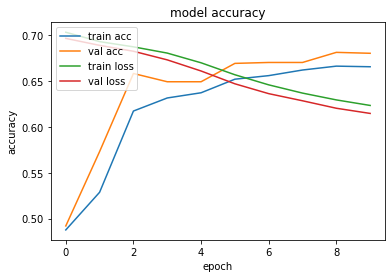

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_loss_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'val acc', 'train loss', 'val loss'], loc='upper left')
    plt.show()
    
plot_loss_acc(hist)

What is wrong with the model and why does it not work?

## Exercise #1: can you make a Keras model that beats the previous one at modelling the XOR?

Take 15 minutes or so to:

* experiment with Dense layers (check out https://keras.io/layers/core/ for more information)
* activations? ("linear", "sigmoid", "tanh", "softmax", "relu". Others: https://keras.io/api/layers/activations/)
* maybe try with larger datasets?
* epoch numbers?
* batch size?
* different optimizers? (https://keras.io/api/optimizers/)
* different loss functions? (https://keras.io/api/losses/)
* it's up to you!

When you are done, we will pick one or two best models and check their ability to generalize to new outputs on our test set.



Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 4s 400us/step - loss: 0.5937 - accuracy: 0.6669 - val_loss: 0.4361 - val_accuracy: 0.8020
Epoch 2/10
9000/9000 [==============================] - 3s 352us/step - loss: 0.4389 - accuracy: 0.8007 - val_loss: 0.4280 - val_accuracy: 0.8060
Epoch 3/10
9000/9000 [==============================] - 3s 381us/step - loss: 0.4358 - accuracy: 0.8031 - val_loss: 0.4324 - val_accuracy: 0.8040
Epoch 4/10
9000/9000 [==============================] - 3s 372us/step - loss: 0.4308 - accuracy: 0.8030 - val_loss: 0.4283 - val_accuracy: 0.8050
Epoch 5/10
9000/9000 [==============================] - 4s 404us/step - loss: 0.4299 - accuracy: 0.8050 - val_loss: 0.4301 - val_accuracy: 0.7970
Epoch 6/10
9000/9000 [==============================] - 4s 429us/step - loss: 0.4281 - accuracy: 0.8068 - val_loss: 0.4272 - val_accuracy: 0.7920
Epoch 7/10
9000/9000 [==============================] - 4s 400us/step - loss

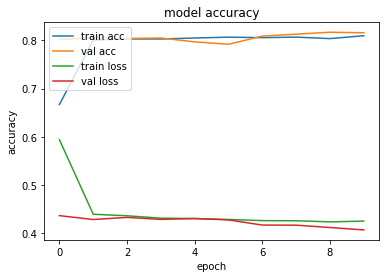

Test loss: 0.3916722960472107, test accuracy 0.8264999985694885


In [35]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

#We want a "clean" model, not the one trained on random data from before
model = Sequential()

model.add(Dense(units=3, activation='tanh', input_dim=3))
model.add(Dense(units=3, activation='tanh', input_dim=3))
model.add(Dense(units=3, activation='tanh', input_dim=3))
model.add(Dense(units=3, activation='tanh', input_dim=3))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

# Train the model, iterating on the data in batches of 32 samples
# !!! NOTICE THE validation_split PARAMETER !!! This means that the last 10% of the training set will not
# be used for training, just to evaluate the model.
# This is not always a good strategy, but it works fine in this case
hist = model.fit(train_x, train_y, epochs=10, batch_size=2,validation_split=0.1)

(loss, accuracy) = model.evaluate(test_x, test_y)

plot_loss_acc(hist)

print("Test loss: {}, test accuracy {}".format(loss,accuracy))

















# Use case #2: classifying text data (tweets)

Now, let's try something completely different. We will load a new dataset from disk, clean it up and prepare it for training. The data here is of a completely different type, as this is a set of 3000 tweets. So, we have to deal with short text inputs.

Each tweet has been written by one of two well-known individuals from the world of US politics. Our task is simply to decide who wrote it. Donald or Hillary?

<img src="figures/trump-clinton-split.jpg">

The first question here is: how do we deal with string inputs? We can't multiply a word by a weight, so we need to translate the text input in numbers before we proceed and feed it to our first layer. In this case, there are usually two options. The first is called "one-hot" encoding, where each word in a dictionary is translated to a vectors of ones and zeros. If there are 10 words in our dictionary (for example, the words are "zero", "one", "two" ... "nine"), each vector will contain ten elements, with nine elements set to zero and one set to one:

* "zero" -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
* "one"  -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
* "two"  -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
* ...
* "nine" -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

This is usually ok when dealing with text (or, more generically, "categorical") variables taken from a relatively short dictionary. In the case of tweets, we might be dealing with very a dictionary containing tens of thousands of different terms, so we would have huge inputs of sparse vectors of zeros and ones. This is not ideal.

The second option is to use word embeddings, which translate each word to a vector of floating points with some nice properties, as we can see in the following image:

<img src="figures/Word-Vectors.png">

Check out [this cool page](https://anvaka.github.io/pm/#/galaxy/word2vec-wiki?cx=-17&cy=-237&cz=-613&lx=-0.0575&ly=-0.9661&lz=-0.2401&lw=-0.0756&ml=300&s=1.75&l=1&v=d50_clean) visualizing embeddings calculated on the whole English dictionary for more examples.

Embeddings are done with a special NN layer that in Keras is called simply "Embedding" (https://keras.io/layers/embeddings/). The Embedding layer is provided with a number of text inputs (in our case, tweets) and learns to map similar words into n-dimensional vectors that are close together in the corresponding n-dimensional space.

In the following piece of code, we will start by loading the dataset with pandas (https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) and preparing it for training.

Notice how before we can use the Embedding layer, we want to map each word to an integer. This is because the input to an Embedding layer is actually a set of integers, where each integer represents a word. The important thing here, is that a given word has to be mapped always to the same integer throughout the whole dataset, so that the Embedding layer can recognise it from different tweets.

In this case, for example, the word "the" will always be mapped to the number 1, the word "question" to the number 2, etc.

* "The question is what to do"      -> [1, 2, 32, 55, 87]
* "I don't understand the question" -> [12, 4, 123, 1, 2]

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tweet_dataset = pd.read_csv("./tweets.csv")

#First of all, let's get rid of all retweets
tweet_dataset = tweet_dataset[tweet_dataset["is_retweet"] == False]

#Next, let's remove all URLs, since they should not be of any help (unless we actually checked what they link to)
tweet_dataset["text"] = tweet_dataset["text"].str.replace('http\S+|www.\S+', '', case=False)

#remove "special" words such as twitter handles
tweet_dataset["text"] = tweet_dataset["text"].str.replace('@[a-zA-Z0-9]*', '', case=False)
#remove hashtags
tweet_dataset["text"] = tweet_dataset["text"].str.replace('#[a-zA-Z0-9]*', '', case=False)
#Remove #-H
tweet_dataset["text"] = tweet_dataset["text"].str.replace('-H', '', case=False)

#Now let's make sure that non-alphanumeric characters are taken as single words
tweet_dataset["text"] = tweet_dataset["text"].str.replace('\s*([^a-zA-Z0-9 ])\s*', ' \\1 ', case=False)

#make all words lower case?
tweet_dataset["text"] = tweet_dataset["text"].str.lower()

#split the tweets in list of words
tweet_dataset["text"] = tweet_dataset["text"].str.strip()
tweet_dataset["text"] = tweet_dataset["text"].str.split(" ")

#since the neural networks don't really like string inputs,
#we have to convert each word to a unique integer.
integer_dict = {}
integer_dict["padding"] = 0

word_dict = {}
word_dict[0] = "padding"

#assign a unique integer to each unique word
count = 1
for index, row in tweet_dataset.iterrows():
    for element in row["text"]:
        if element not in integer_dict.keys():
            
            integer_dict[element] = count
            word_dict[count] = element
            count += 1
    
tweet_dataset["numbers"] = tweet_dataset["text"].apply(lambda x:[integer_dict[y] for y in x])

#Let's also assign integer labels 
tweet_dataset.loc[tweet_dataset["handle"] == "realDonaldTrump","label"] = 1
tweet_dataset.loc[tweet_dataset["handle"] == "HillaryClinton","label"] = 0

#The longest tweet has 58 words, this will add padding to shorter tweets
train_x = pd.DataFrame(tweet_dataset["numbers"].values.tolist()).values
train_x[np.where(np.isnan(train_x[:]))] = 0

train_y = np.array(tweet_dataset["label"])


Now, we will see how we can use Embeddings to transform our dictionary of words into a dictionary of float vectors.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 58, 32)            272640    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1856)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                18570     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 22        
Total params: 291,232
Trainable params: 291,232
Non-trainable params: 0
_________________________________________________________________
Train on 4577 samples, validate on 1145 samples
Epoch 1/10
4577/4577 [==============================] - 2s 374us/step - loss: 0.5909 - acc: 0.7055 - val_loss: 0.5302 - val_acc: 0.8550
Epoch 2/10
4577/4577 [==============================] - 1s 263us/step - loss: 0.3582

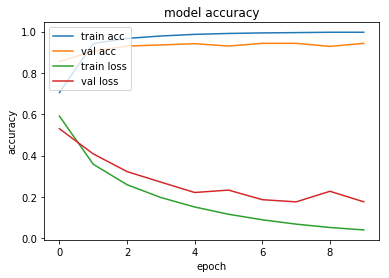

In [15]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

model = Sequential()

model.add(Embedding(input_dim=count, output_dim=32, input_length=train_x.shape[1], name='embeddings'))
model.add(Flatten()) #Dense layers only accept 1D inputs, so we need to flatten the output from Embedding, which is 2D
model.add(Dense(10, activation='softmax'))
model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

hist = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2)

plot_loss_acc(hist)


What other kind of layer is perfect for this kind of classification task where we are dealing with a time series?

Train on 5149 samples, validate on 573 samples
Epoch 1/10
5149/5149 [==============================] - 10s 2ms/step - loss: 0.6879 - acc: 0.5403 - val_loss: 0.7040 - val_acc: 0.5794
Epoch 2/10
5149/5149 [==============================] - 9s 2ms/step - loss: 0.3660 - acc: 0.8957 - val_loss: 0.3680 - val_acc: 0.8534
Epoch 3/10
5149/5149 [==============================] - 9s 2ms/step - loss: 0.2000 - acc: 0.9386 - val_loss: 0.2467 - val_acc: 0.8848
Epoch 4/10
5149/5149 [==============================] - 9s 2ms/step - loss: 0.1198 - acc: 0.9615 - val_loss: 0.2578 - val_acc: 0.9215
Epoch 5/10
5149/5149 [==============================] - 9s 2ms/step - loss: 0.0880 - acc: 0.9713 - val_loss: 0.1400 - val_acc: 0.9389
Epoch 6/10
5149/5149 [==============================] - 9s 2ms/step - loss: 0.0639 - acc: 0.9814 - val_loss: 0.1860 - val_acc: 0.9494
Epoch 7/10
5149/5149 [==============================] - 9s 2ms/step - loss: 0.0465 - acc: 0.9856 - val_loss: 0.2668 - val_acc: 0.9616
Epoch 8/10
514

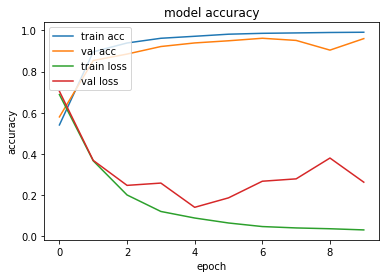

In [23]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout

model = Sequential()

model.add(Embedding(count, 32, input_length=train_x.shape[1], name='embeddings'))
model.add(LSTM(5, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(2, activation='softmax'))

model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

hist = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.1)

plot_loss_acc(hist)


Now let's visualize the outputs of the embedding layer. We extract the embedding layer from the trained model and we use it to calculate embeddings for every word in our dictionary. Then, we map the 32-dimensional output vector onto 2 dimensions with the help of principal component analysis.

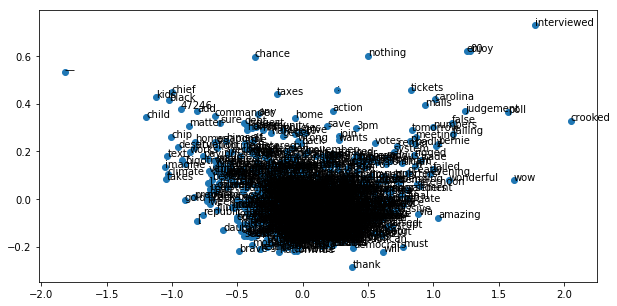

In [20]:
%matplotlib inline

import mpld3
mpld3.enable_notebook()

from keras.models import Model
from keras.layers import Flatten
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from matplotlib.pyplot import scatter
plt.rcParams['figure.figsize'] = [10, 5]

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('embeddings').output)

n_words = 1000
inputs = np.zeros((n_words, train_x.shape[1]))
for i in range(n_words):
    word = word_dict[i]
    for count in range(train_x.shape[1]):
        inputs[i, count] = i
    
intermediate_output = intermediate_layer_model.predict(inputs)

points = np.squeeze(intermediate_output[:,0,:])

pca = PCA(n_components=2, svd_solver='full')
points_pca = pca.fit_transform(points)

fig, ax = plt.subplots()
ax.scatter(points_pca[:,0], points_pca[:,1])

for i in range(n_words):
    ax.annotate(word_dict[i], (points_pca[i,0], points_pca[i,1]))


# Exercise #2, what is wrong (or right) with this dataset?

* Take a few minutes to analyze the word cloud. Can you see what kind of words make the classification easier? If you wanted to make a less biased (and harder to classify) dataset, what would you change? 

* If possible, go back to the dataset generation step and remove words that make the classification task too easy. Then, try and train a new network. Are the results the same as before? (Learn a bit more about data leakage: https://machinelearningmastery.com/data-leakage-machine-learning/)

* Now that we have trained and validated our model, what would you suggest using as test set?


# Use case #3: classifying images with convolutional networks

The third and final use case is an example of use of the (in)famous convolutional networks. We will try and recognise objects from pictures, which means (once more) classifying images in a set of predefined classes (is it a bird? Is it a plane? <s>Is it Superman?</s>)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


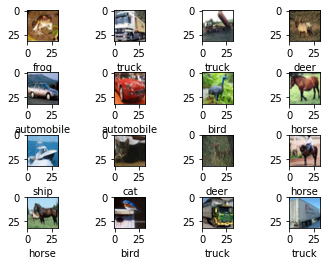

In [24]:
%matplotlib inline

# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
pyplot.subplots_adjust(hspace=1)
classes = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog", 7 : "horse", 8 : "ship", 9 : "truck"}

(train_x, train_y), (test_x, test_y) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_x.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape))
# plot first few images
for i in range(16):
    # define subplot
    ax = pyplot.subplot(4,4, 1 + i)
    ax.set_xlabel(classes[train_y[i,0]])
    # plot raw pixel data
    pyplot.imshow(train_x[i])
# show the figure
pyplot.show()

Now let's try to classify each image in the correct category. Let's whip out Keras again:

In [22]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(8, (5, 5), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(16, (9, 9)))
model.add(Activation('relu'))
model.add(Conv2D(32, (11, 11)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
model.summary()
model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

#If you want, you can save a model to disk by uncommenting the next few lines
#if not os.path.isdir(save_dir):
#    os.makedirs(save_dir)
#model_path = os.path.join(save_dir, model_name)
#model.save(model_path)
#print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 8)         608       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        10384     
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        61984     
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
max

KeyboardInterrupt: 

In [18]:
model.layers

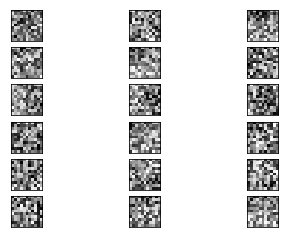

In [24]:
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
    # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

# Exercise #3, can you build a CNN according to these specs?

Before you become a Neural Network architect, it is probably a good idea to be able to build from a predefined blueprint. Given the figure below, it should be possible to build a CNN model for the prediction of Cifar-10 classes. 

* Write your own code to match the specs in the figure:

<img src="figures/Neural_Network_Model_Definition.jpg-1040x0.jpg">

* What is missing from the figure to fully determine the architecture? 
* What kind of design choices can we make to fill in the gaps?
* Do you think that this network would work better than our first example?

# Build fancier nets with Keras' functional API

Our very first model was built using the Sequential function:

In [2]:
from keras.models import Sequential

model = Sequential()
from keras.layers import Dense

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))

model.summary()
model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])   

/home/claudio/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


But sometimes it is not possible to use sequential models. For example if we wanted to have a more complex model with multiple inputs and/or multiple outputs. This is where the functional API comes to the rescue! It is pretty simple to use once we can appreciate the difference between a layer and a tensor. Here is the exact same network, written with the functional API instead:

In [5]:
from keras import Model
from keras.layers import Input, Dense

#declare the layers first
inputs = Input(shape=(3,))
dense1 = Dense(3, activation='relu')
dense2 = Dense(2, activation='softmax')

#then use the layers as functions
dense1_out = dense1(inputs)
dense2_out = dense2(dense1_out)
model = Model(inputs=inputs, outputs=dense2_out)

model.summary()
model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


So, how do we write a network with two separate input layers and two separate output layers? Here is an example from the Keras docs (https://keras.io/guides/functional_api/):

>For example, if you're building a system for ranking custom issue tickets by priority and routing them to the correct department, then the model will have three inputs:

>* the title of the ticket (text input),
>* the text body of the ticket (text input), and
>* any tags added by the user (categorical input)

>This model will have two outputs:

>* the priority score between 0 and 1 (scalar sigmoid output), and
>* the department that should handle the ticket (softmax output over the set of departments).

In [2]:
import pydot
from keras import Model
from keras.layers import Input, Dense, Embedding, LSTM, concatenate
from keras.utils import plot_model

num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

plot_model(model, "figures/multi_input_and_output_model.png", show_shapes=True)

<img src="figures/multi_input_and_output_model.png">

# Exercise #4, can you re-build the previous CNN using the functional model?